In [25]:
import skimage
from skimage import data
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [26]:
bird = mpimg.imread("datasets/images/bird.jpeg")

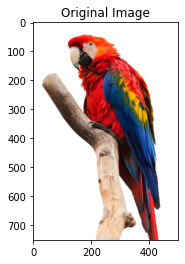

In [27]:
plt.title("Original Image")
plt.imshow(bird)

In [28]:
bird.shape

(750, 500, 3)

In [29]:
bird[200:250, 200:250]

array([[[157,   9,   9],
        [176,  26,  28],
        [185,  30,  36],
        ...,
        [ 55,  91, 165],
        [ 45,  84, 149],
        [ 61, 100, 159]],

       [[148,   5,   7],
        [163,  18,  21],
        [170,  21,  27],
        ...,
        [ 64,  93, 169],
        [ 50,  85, 151],
        [ 64, 100, 162]],

       [[139,   3,   5],
        [149,  10,  15],
        [152,   9,  15],
        ...,
        [ 67,  90, 168],
        [ 53,  86, 155],
        [ 66, 101, 165]],

       ...,

       [[198,  25,  18],
        [207,  28,  23],
        [212,  27,  24],
        ...,
        [ 28,  57, 123],
        [ 40,  47, 117],
        [ 40,  49, 116]],

       [[200,  26,  19],
        [210,  31,  26],
        [217,  34,  30],
        ...,
        [ 25,  53, 118],
        [ 35,  44, 113],
        [ 33,  44, 110]],

       [[200,  26,  19],
        [208,  29,  24],
        [214,  32,  29],
        ...,
        [ 29,  54, 118],
        [ 34,  45, 111],
        [ 30,  46, 108]]

In [30]:
bird_reshape = bird.reshape(bird.shape[0], -1)
bird_reshape.shape

(750, 1500)

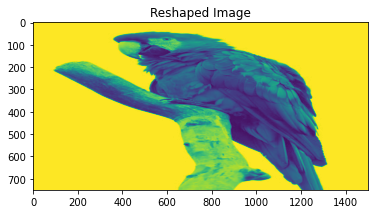

In [31]:
plt.figure(figsize=(6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_reshape)

In [32]:
bird_resized = skimage.transform.resize(bird, (500, 500))
bird_resized.shape

(500, 500, 3)

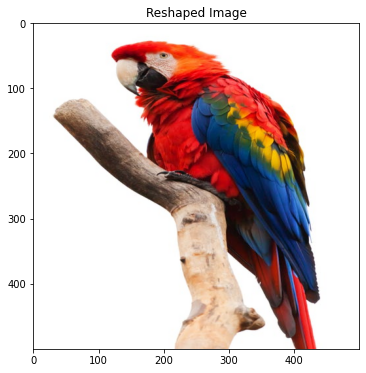

In [33]:
plt.figure(figsize=(6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_resized)

In [34]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  0.6666666666666666
Resized aspect ratio:  1.0


In [35]:
bird_rescaled = skimage.transform.rescale(bird_resized,
                                          (1.0, aspect_ratio_original),
                                          channel_axis=2)
bird_rescaled.shape

(500, 333, 3)

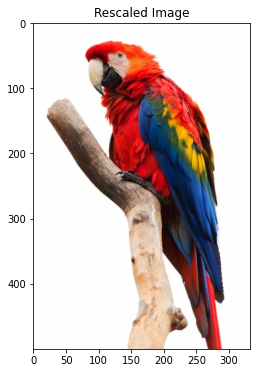

In [36]:
plt.figure(figsize=(6, 6))
plt.title("Rescaled Image")
plt.imshow(bird_rescaled)

In [37]:
aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])

print("Rescaled aspect ratio: ", aspect_ratio_rescaled)

Rescaled aspect ratio:  0.666


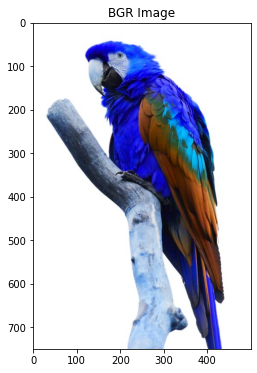

In [38]:
bird_BGR = bird[:, :, (2, 1, 0)]

plt.figure(figsize=(6, 6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [39]:
bird_BGR.shape

(750, 500, 3)

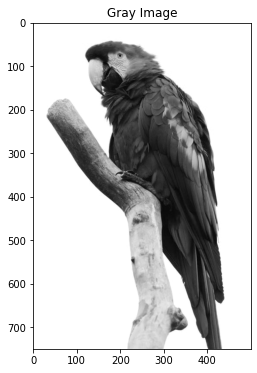

In [40]:
bird_gray = skimage.color.rgb2gray(bird)

plt.figure(figsize=(6, 6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap='gray')

In [41]:
bird_gray.shape

(750, 500)

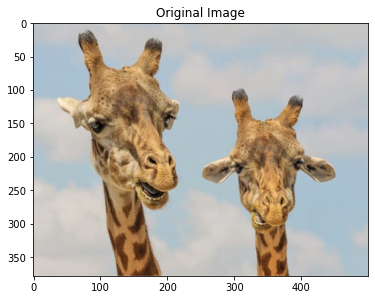

In [42]:
giraffes = skimage.img_as_float(
    skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(giraffes)

In [43]:
giraffes.shape

(378, 500, 3)

In [44]:
def crop(image, cropx, cropy):
    y, x, c = image.shape

    startx = x // 2 - (cropx // 8)
    starty = y // 3 - (cropy // 4)

    stopx = startx + cropx
    stopy = starty + 2 * cropy

    return image[starty:stopy, startx:stopx]

In [45]:
giraffes_cropped = crop(giraffes, 256, 256)

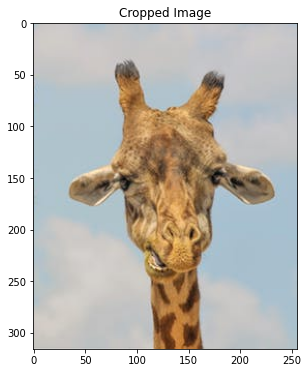

In [46]:
plt.figure(figsize=(6, 6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)

In [47]:
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var = sigma**2)

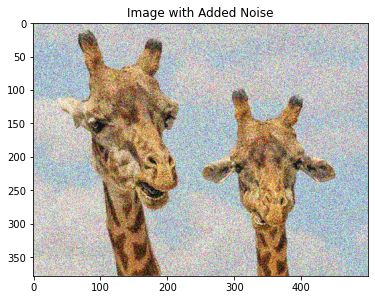

In [48]:
plt.figure(figsize=(6, 6))
plt.title("Image with Added Noise")
plt.imshow(noisy_giraffes)

In [51]:
sigma_est = estimate_sigma(noisy_giraffes,channel_axis=-1, average_sigmas=True)

In [52]:
sigma_est

0.14697016889497783

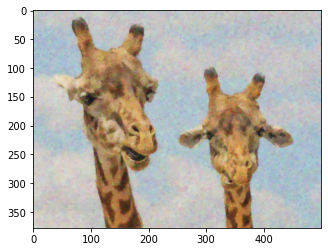

In [55]:
plt.imshow(denoise_tv_chambolle(noisy_giraffes, weight=0.1, channel_axis=-1));

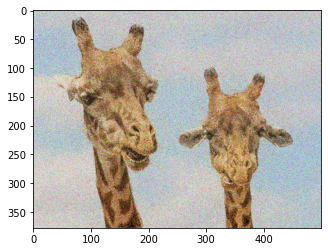

In [56]:
plt.imshow(denoise_bilateral(noisy_giraffes, sigma_color=0.05, sigma_spatial=15, channel_axis=-1));

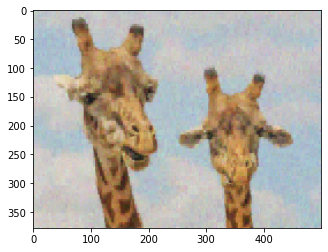

In [57]:
plt.imshow(denoise_wavelet(noisy_giraffes, channel_axis=-1));

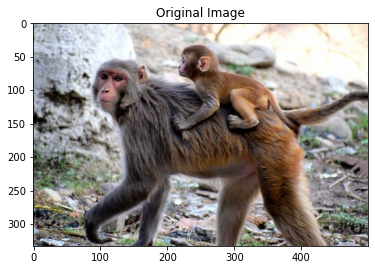

In [59]:
monkeys = skimage.img_as_float(skimage.io.imread('datasets/images/monkeys.jpeg')).astype(np.float32)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(monkeys);

In [60]:
monkeys_flip = np.fliplr(monkeys)

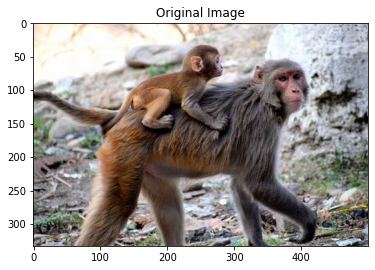

In [61]:
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(monkeys_flip);

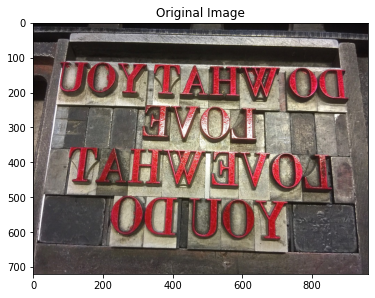

In [62]:
mirror = skimage.img_as_float(skimage.io.imread('datasets/images/book-mirrored.jpg')).astype(np.float32)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(mirror);

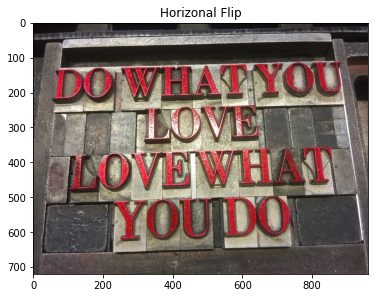

In [63]:
mirror_flip = np.fliplr(mirror)

plt.figure(figsize=(6,6))
plt.title("Horizonal Flip")
plt.imshow(mirror_flip);